In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [58]:
df=pd.read_csv("student_result.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [84]:
df["race/ethnicity"].nunique()

5

In [59]:
df["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

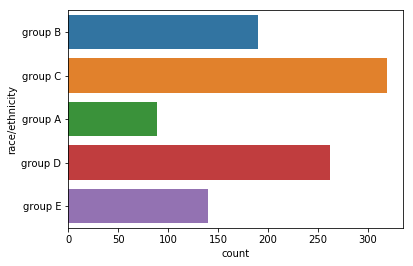

In [83]:
sns.countplot(y="race/ethnicity",data=df)

In [61]:
math=df["math score"]
reading=df["reading score"]
writing=df["writing score"]
np.mean(math)

66.089

In [223]:
type(math)

pandas.core.series.Series

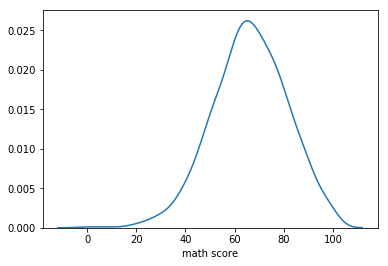

In [85]:
sns.distplot(math,hist=False)

In [63]:
np.median(math)

66.0

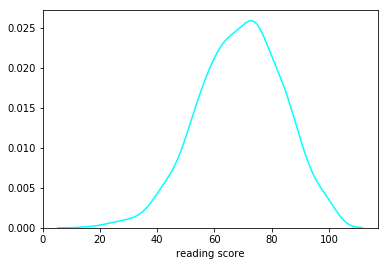

In [64]:
sns.distplot(reading,hist=False,color="cyan")

In [65]:
np.mean(reading)

69.169

In [66]:
import scipy
from scipy import stats
stats.mode(math)[0][0]

65

In [67]:
#math.value_counts()

In [68]:
group=df.groupby(["gender","race/ethnicity"])["math score","reading score","writing score"].mean()
group

math score  reading score  writing score
gender race/ethnicity                                          
female group A          58.527778      69.000000      67.861111
       group B          61.403846      71.076923      70.048077
       group C          62.033333      71.944444      71.777778
       group D          65.248062      74.046512      75.023256
       group E          70.811594      75.840580      75.536232
male   group A          63.735849      61.735849      59.150943
       group B          65.930233      62.848837      60.220930
       group C          67.611511      65.424460      62.712230
       group D          69.413534      66.135338      65.413534
       group E          76.746479      70.295775      67.394366

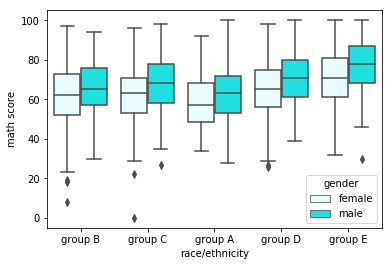

In [93]:
sns.boxplot(x="race/ethnicity",y="math score",hue="gender",data=df,color="cyan")

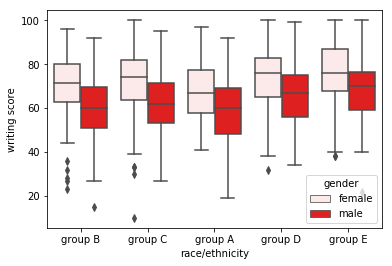

In [97]:
sns.boxplot(x="race/ethnicity",y="writing score",hue="gender",data=df,color="red")

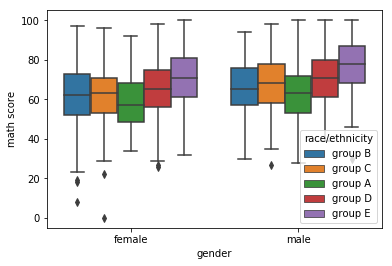

In [100]:
sns.boxplot(hue="race/ethnicity",y="math score",x="gender",data=df)

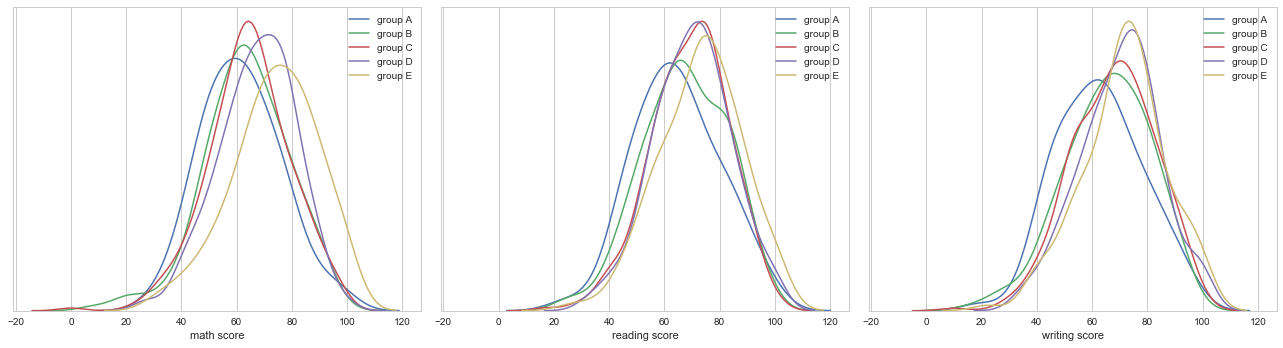

In [218]:
#finding groupwise distribution
list1=["group A","group B","group C","group D","group E"]
list2=["math score","reading score","writing score"]
f, axes = plt.subplots(1, 3, figsize=(18,5), sharex=True)
for j in range(len(list2)):
    for i in list1:
        df_=df[df["race/ethnicity"]==i]
        sns.distplot(df_[list2[j]],hist=False,kde_kws = {'shade': False, 'linewidth': 1.5},label=i,ax=axes[j])

plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

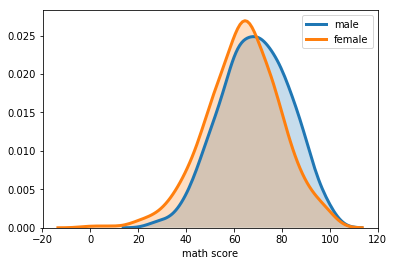

In [78]:
#now gender wise distribution
list3=["male","female"]
list2=["math score","reading score","writing sore"]
for i in list3:
    df_=df[df["gender"]==i]
    sns.distplot(df_[list2[0]],hist=False,kde_kws = {'shade': True, 'linewidth': 3},label=i)
    

In [79]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [101]:
#now finding relation between parental education and scores

df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

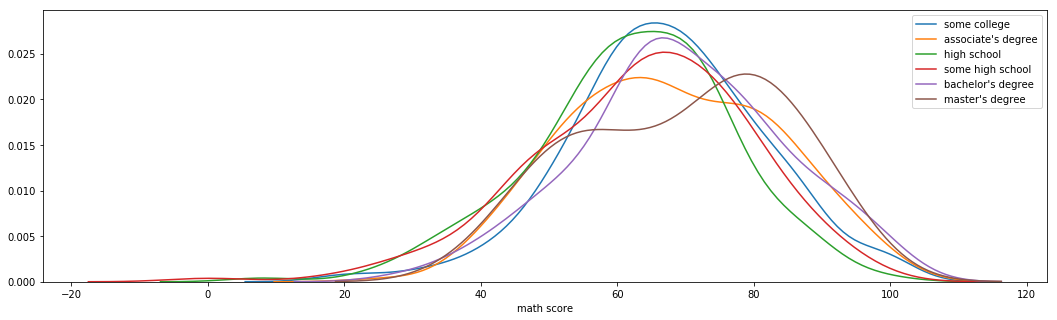

In [115]:
list4=["some college","associate's degree","high school","some high school","bachelor's degree","master's degree"]
plt.figure(figsize=(18,5))
for i in list4:
    df_p=df[df["parental level of education"]==i]
    sns.distplot(df_p["math score"],hist=False,kde_kws = {'shade': False, 'linewidth': 1.5},label=i)

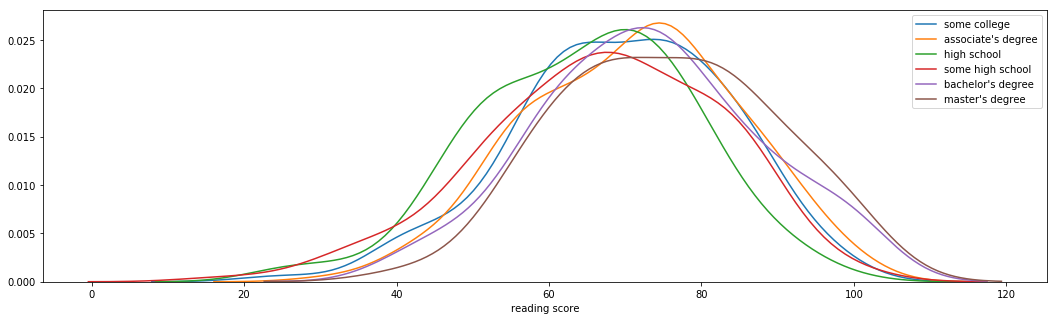

In [118]:
list4=["some college","associate's degree","high school","some high school","bachelor's degree","master's degree"]
plt.figure(figsize=(18,5))
for i in list4:
    df_p=df[df["parental level of education"]==i]
    sns.distplot(df_p["reading score"],hist=False,kde_kws = {'shade': False, 'linewidth': 1.5},label=i)

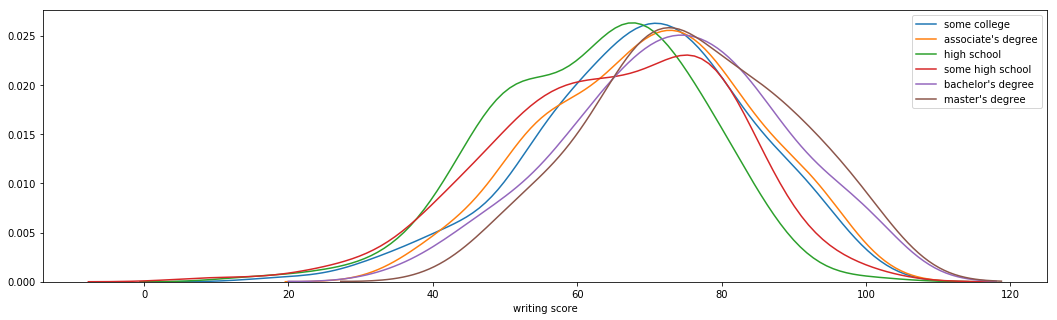

In [119]:
list4=["some college","associate's degree","high school","some high school","bachelor's degree","master's degree"]
plt.figure(figsize=(18,5))
for i in list4:
    df_p=df[df["parental level of education"]==i]
    sns.distplot(df_p["writing score"],hist=False,kde_kws = {'shade': False, 'linewidth': 1.5},label=i)

In [120]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


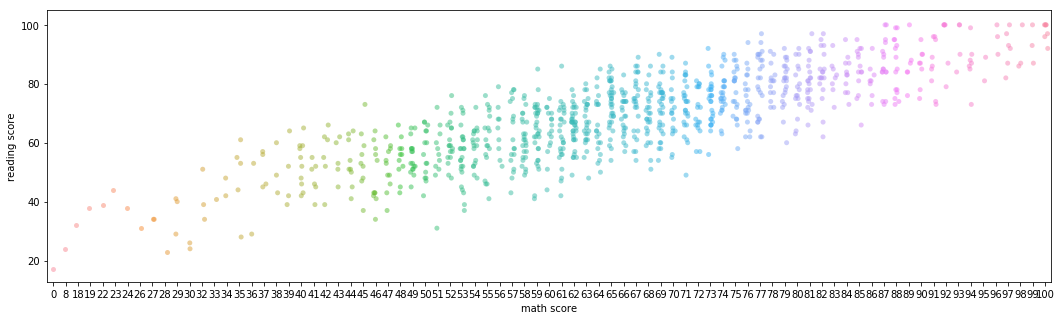

In [141]:
plt.figure(figsize=(18,5))
sns.stripplot(x="math score",y="reading score",alpha=0.5,data=df,jitter=0.2)

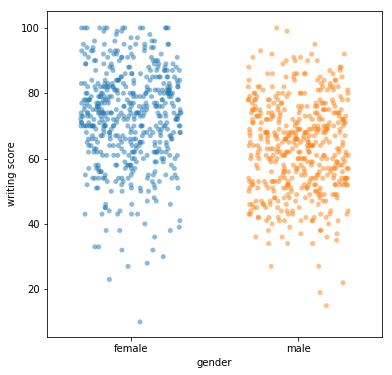

In [147]:
plt.figure(figsize=(6,6))
sns.stripplot(x="gender",y="writing score",alpha=0.5,data=df,jitter=0.3)

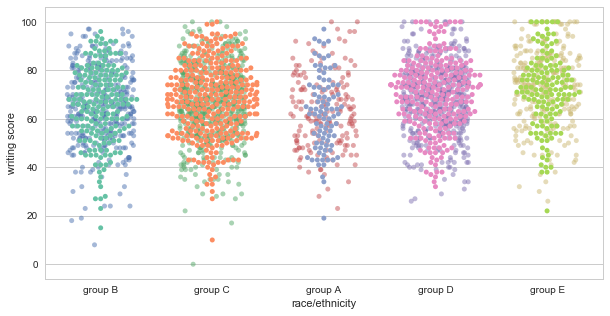

In [211]:
plt.figure(figsize=(10,5))
#sns.set(style="whitegrid")
sns.stripplot(x="race/ethnicity",y="math score",alpha=0.5,data=df,jitter=0.3)
sns.stripplot(x="race/ethnicity",y="reading score",alpha=0.5,data=df,jitter=0.3)

sns.swarmplot(x="race/ethnicity",y="writing score",data=df,palette="Set2")

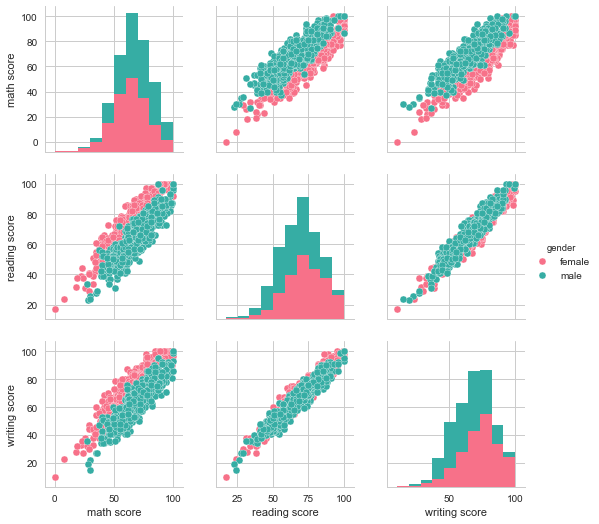

In [212]:
sns.pairplot(df,hue="gender",palette="husl")

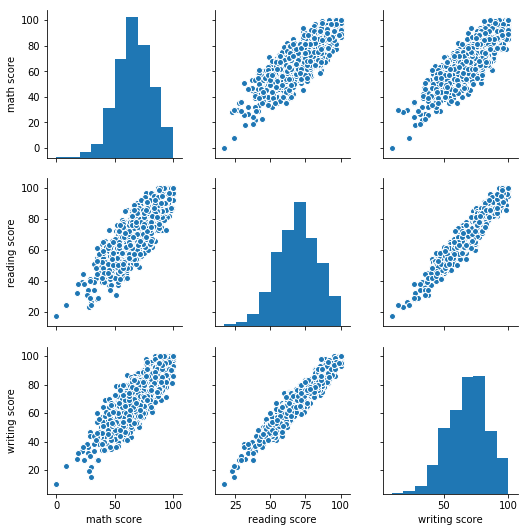

In [178]:
sns.pairplot(df)

In [179]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
plt.figure(figsize=(12,7))
sns.catplot(y="Gender", x="Math_Score",
                 hue="Parental_Level_of_Education",
                 data=data, kind="bar")
plt.title('for Parental Level Of Education Gender & Math_Score')
plt.show()

In [ ]:
sns.lmplot(x='Math_Score',y='Writing_Score',hue='Gender',data=data,markers=['x','o'])
plt.xlabel('Math Score')
plt.ylabel('Writing Score')
plt.title('Math Score vs Writing Score')
plt.show()

In [ ]:
sns.kdeplot(data['Reading_Score'],data['Writing_Score'],shade=True)
plt.show()

In [ ]:
sns.kdeplot(data['Math_Score'],bw=.15)
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Math Score Show Kde Plot')
plt.show()

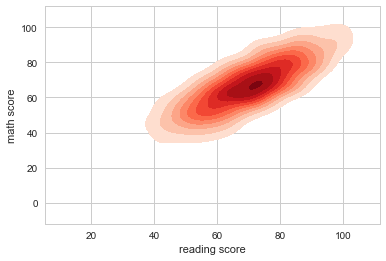

In [196]:
sns.kdeplot(df['reading score'],df['math score'],cmap='Reds',shade=True,shade_lowest=False)
#sns.kdeplot(data['Writing_Score'],data['Reading_Score'],cmap='Blues',shade=True,shade_lowest=False)
plt.show()

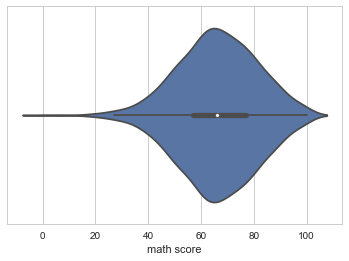

In [197]:
sns.violinplot(df['math score'])


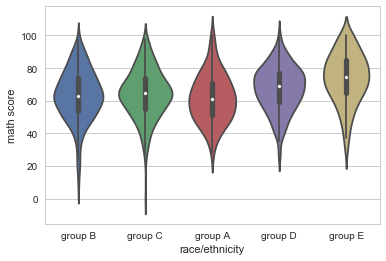

In [195]:
sns.violinplot(x=df['race/ethnicity'],y=df['math score'])
plt.show()

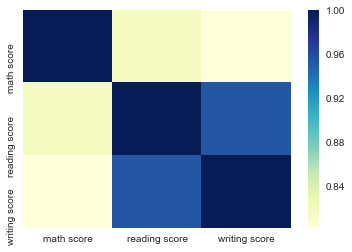

In [192]:
sns.heatmap(df.corr(),cmap='YlGnBu')
plt.show()

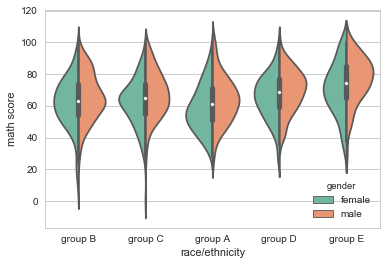

In [191]:
sns.violinplot(x=df["race/ethnicity"],y=df["math score"],hue=df["gender"],split=True,palette="Set2")

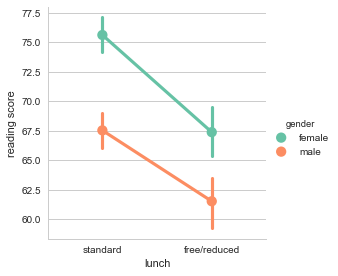

In [203]:
sns.factorplot(x="lunch", y="reading score", hue="gender", data=df,palette="Set2")
plt.show()

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
sns.barplot(x = 'gender', y = 'reading score', data = df)

plt.subplot(1,3,2)
sns.barplot(x = 'gender', y = 'writing score', data = df)

plt.subplot(1,3,3)
sns.barplot(x = 'gender', y = 'math score', data = df)

plt.tight_layout()

In [ ]:
sns.kdeplot(data['Reading_Score'],data['Writing_Score'])
plt.show()

In [ ]:
"""
n_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2',
'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys',
'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 
'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2',
'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r',
'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 
'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 
'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 
'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 
'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r',
'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis',
'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix',
'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat'
, 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 
'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 
'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 
'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 
'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 
'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer',
'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 
'tab20c_r', 'terrain', 'terrain_r', 'twilight', 
'twilight_r', 'twilight_shifted', 'twilight_shifted_r',
'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

"""